## [Analytical Solution](https://diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6)

1. Express Lagrangian in terms of $$\theta_1, \theta_2, \dot{\theta_1}, \dot{\theta_2}$$

2. Solve for 

$$
\frac {\partial L}{\partial \dot{\theta}_i}
$$

and 

$$
\frac {\partial L}{\partial \theta_i}
$$

where i = 1,2

3. Solve Lagrangian as a system of second order nonlinear diff eqs 

4. Divide $\ddot{\theta_1}$ evaluated L by (m1+m2)l1 and   $\ddot{\theta_2}$ evaluated L by l2 

to get:

\begin{eqnarray}
\alpha_1(\theta_1,\theta_2) &:=& \displaystyle\frac{l_2}{l_1}\left(\frac{m_2}{m_1 + m_2}\right)\cos(\theta_1 - \theta_2)\end{eqnarray}

\begin{eqnarray}\alpha_2(\theta_1,\theta_2) &:=& \frac{l_1}{l_2}\cos(\theta_1-\theta_2)\end{eqnarray}


and 

\begin{eqnarray}
\displaystyle f_1(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) &:=& -\frac{l_2}{l_1}\left(\frac{m_2}{m_1+m_2}\right) \dot{\theta}_2^2\sin(\theta_1 - \theta_2) - \frac{g}{l_1} \sin\theta_1 \end{eqnarray}


\begin{eqnarray}\displaystyle f_2(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) &:=&
\frac{l_1}{l_2}\dot{\theta}_1^2\sin(\theta_1-\theta_2) - \frac{g}{l_2} \sin\theta_2
\end{eqnarray}

5. $f_1$ does not depend on $\dot{\theta_1}$ and $f_2$ does not depend on $\dot{\theta_2}$

but the matrix A depends on $\theta_1$ and $\theta_2$ since $\alpha_1$ and $\alpha_2$ depend on $\theta$


$$A
\left( \begin{matrix}
\ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix} \right) =
\left( \begin{matrix}
1 & \alpha_1  \\[3pt]
\alpha_2 & 1
\end{matrix} \right)
\left( \begin{matrix}
\ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix} \right) =
\left( \begin{matrix} f_1 \\ f_2 \end{matrix} \right)
$$

6. By taking the inverse of A * $\left( \begin{matrix} f_1 \\ f_2 \end{matrix} \right)$ we get 

\begin{eqnarray}
\left( \begin{matrix}
\ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix} \right) =
A^{-1}
\left( \begin{matrix} f_1 \\[3pt] f_2 \end{matrix} \right)
=
\displaystyle\frac{1}{1 - \alpha_1\alpha_2}
\left( \begin{matrix} f_1 - \alpha_1 f_2\\[3pt] -\alpha_2 f_1 + f_2 \end{matrix} \right)
\end{eqnarray}

and $\alpha$ and f on the same side of the matrix 

7. So taking the system with respect to d/dt we get

$\displaystyle\frac{d}{dt}
\left( \begin{matrix} \theta_1 \\[1pt] \theta_2 \\[1pt] \omega_1 \\[1pt] \omega_1 \end{matrix} \right)
=
\left( \begin{matrix} \omega_1 \\ \omega_2 \\ g_1(\theta_1,\theta_2,\omega_1,\omega_2)
\\ g_2(\theta_1,\theta_2,\omega_1,\omega_2) \end{matrix} \right)
$

where the solutions g1 and g2 are given by the matrix calculations above resulting in 

$g_1 := \displaystyle\frac{f_1 - \alpha_1 f_2}{1 - \alpha_1\alpha_2}
\quad\quad
g_2 := \displaystyle\frac{-\alpha_2 f_1 + f_2}{1 - \alpha_1\alpha_2}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

$$
\ddot{y} = f(y,\dot{y})
$$

$$
\vec{y} = \begin{bmatrix}
y \\
\dot{y}
\end{bmatrix}
$$

$$
\frac{d}{dt} \vec{y} =\begin{bmatrix}
\dot{y} \\
f(y,\dot{y})
\end{bmatrix}
$$

In [ ]:
l1 = 1
l2 = 1
m1 = 1
m2 = 1
theta1_0 = 1.1
theta2_0 = 1.1
theta1d_0 = 0
theta2d_0 = 0
g = 9.8

In [ ]:
def dynamics(yvec,t):  # [th1, th2, th1dot, th2dot]
  t1 = yvec[0]
  t2 = yvec[1]
  t1d = yvec[2]
  t2d = yvec[3]
  mr = m2/(m1+m2)
  A = 1
  B = mr*12/11*np.cos(t1-t2)
  C = 11/12*np.cos(t1-t2)
  D = 1
  E = -mr*12/11*t2d**2*np.sin(t1-t2)-g/11*np.sin(t1)
  F = 11/12*t1d**2*np.sin(t1-t2)-g/12*np.sin(t2)
  return np.array([t1d,t2d,
                   (D*E-B*F)/(A*D-B*C),
                   (A*F-C*E)/(A*D-B*C)])

In [ ]:
tv0 = np.array([theta1_0,theta2_0,theta1d_0,theta2d_0])
tspan = np.linspace(0,100,1000)
sol = odeint(dynamics,tv0,tspan)

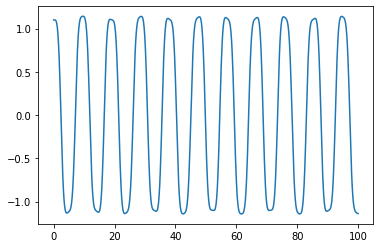

In [ ]:
plt.plot(tspan,sol[:,1])
plt.show()

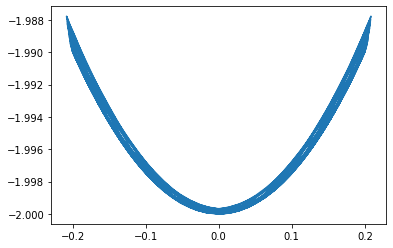

KeyboardInterrupt: ignored

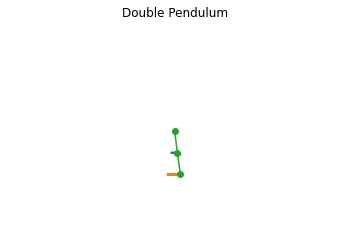

In [ ]:
t1 = sol[:,0]
t2 = sol[:,1]
td1 = sol[:,2]
td2 = sol[:,3]
x1 = l1*np.sin(t1)
y1 = -l1*np.cos(t1)
x2 = x1 + l2*np.sin(t2)
y2 = y1 - l2*np.cos(t2)

plt.plot(x2,y2)
plt.show()

from matplotlib import animation, rc

#plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5)) 
line, = ax.plot([], [], lw=2) 
line2, = ax.plot([], [], lw=2) 
point, = ax.plot([],[], marker='o')

# initialization function 
def init(): 
  # creating an empty plot/frame 
  line.set_data([], []) 
  line2.set_data([], []) 
  return line, point,

# lists to store x and y axis points 
xdata, ydata = [], [] 
x2data, y2data = [], [] 

# animation function 
def animate(i): 
  
  # appending new points to x, y axes points list 
  xdata.append(x1[i]) 
  ydata.append(y1[i]) 
  x2data.append(x2[i]) 
  y2data.append(y2[i]) 
  line.set_data(xdata, ydata)
  line2.set_data(x2data, y2data)
  point.set_data((0,x1[i],x2[i]),(0,y1[i],y2[i]))
  return line, point,
  
# setting a title for the plot 
plt.title('Double Pendulum') 
# hiding the axis details 
plt.axis('off') 

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames = len(x1),blit=True)
# below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim    # or HTML(anim.to_jshtml())
